                                                                                 1. Dishant Parikh - C0934360
                                                                                 2. Opinderjeet Kaur - C0937407
                                                                                 3. Rohit Rajpoot - C0935925
                                                                                 4. Sana Khan - C0937931
                                                                                 5. Zoheb Siddiqui - C0933790

# Problem statement
The goal of this project is to develop a predictive model to estimate the hourly average concentration of Benzene
C6H6(GT)) in the air. Benzene is a harmful pollutant with significant health risks, and its concentration is influenced by various environmental and air quality factors. Using sensor readings, temperature, humidity, and other pollutant concentrations as features, the model aims to accurately predict Benzene levels. This will aid in real-time monitoring and provide insights into the relationship between Benzene concentration and other air quality indicators, contributing to improved air quality management and public health awareness.

### Columns description


| Sl No | Attribute      | Description                                                                        |
|:------|:---------------|:-----------------------------------------------------------------------------------|
| 0     | Date           | Date (DD/MM/YYYY)                                                                  |
| 1     | Time           | Time (HH.MM.SS)                                                                    |
| 2     | CO(GT)         | True hourly averaged concentration CO in mg/m^3 (reference analyzer)               |
| 3     | PT08.S1(CO)    | PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)        |
| 4     | NMHC(GT)       | True hourly averaged overall Non Methane Hydrocarbons concentration in µg/m^3       |
| 5     | C6H6(GT)       | True hourly averaged Benzene concentration in µg/m^3 (reference analyzer)          |
| 6     | PT08.S2(NMHC)  | PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)       |
| 7     | NOx(GT)        | True hourly averaged NOx concentration in ppb (reference analyzer)                |
| 8     | PT08.S3(NOx)   | PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) |
| 9     | NO2(GT)        | True hourly averaged NO2 concentration in µg/m^3 (reference analyzer)             |
| 10    | PT08.S4(NO2)   | PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) |
| 11    | PT08.S5(O3)    | PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)    |
| 12    | T              | Temperature in °C                                                                 |
| 13    | RH             | Relative Humidity (%)                                                             |
| 14    | AH             | Absolute Humidity                                                                 |


In [5]:
pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 44.2 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("/Users/amrit/Downloads/AirQualityUCI.csv", sep = ';')

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
df.shape

(9471, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [13]:
# get the count of unique values for each column
df.nunique()

Date              391
Time               24
CO(GT)            104
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
Unnamed: 15         0
Unnamed: 16         0
dtype: int64

In [15]:
df.describe(percentiles=[0.01, 0.99, 0.80, 0.10, 0.90])

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
1%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
10%,824.000000,-200.000000,581.000000,-200.000000,498.000000,-200.000000,912.000000,483.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
80%,1272.000000,-200.000000,1157.000000,335.000000,1010.000000,143.000000,1721.000000,1348.800000,NaN,NaN
90%,1407.000000,-200.000000,1299.000000,497.400000,1147.000000,171.000000,1886.000000,1577.000000,NaN,NaN
99%,1704.000000,523.000000,1641.880000,971.080000,1651.880000,241.000000,2349.840000,2086.000000,NaN,NaN


#### For the columns NMHC(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), PT08.S4(NO2) and PT08.S5(O3) we see a significant difference between the 99 percentile and max, this means that the max values are most likely outlers 

In [18]:
missing_val = df.isnull()

In [20]:
missing_val.sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [22]:
# getting percentage of missing values for every column
missing_val.mean()

Date             0.012037
Time             0.012037
CO(GT)           0.012037
PT08.S1(CO)      0.012037
NMHC(GT)         0.012037
C6H6(GT)         0.012037
PT08.S2(NMHC)    0.012037
NOx(GT)          0.012037
PT08.S3(NOx)     0.012037
NO2(GT)          0.012037
PT08.S4(NO2)     0.012037
PT08.S5(O3)      0.012037
T                0.012037
RH               0.012037
AH               0.012037
Unnamed: 15      1.000000
Unnamed: 16      1.000000
dtype: float64

#### From the above missing values percentages we can observe that Unnamed: 15 and Unnamed: 16 columns have all null values thus it makes sense to drop these columns. For the remaning columns, the missing values percentage is very low i.e 0.012% thus we can drop those rows

In [25]:
del df['Unnamed: 15']
del df['Unnamed: 16']

In [27]:
df.dropna(axis=0, inplace=True)

In [29]:
# getting percentage of missing values for every column after handling missing values
df.isnull().mean()

Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

In [31]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [33]:
# checking for categorical_columns
df.select_dtypes(include=['object']).columns

Index(['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'], dtype='object')

In [35]:
# creating a new column named as datetime to handle Date and Time column as categorical values
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'].str.replace('.', ':'), format='%d/%m/%Y %H:%M:%S')

In [37]:
# deleting Date and Time col as it's of no use to us after creating a datetime column
del df['Date']
del df['Time']

In [39]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


In [41]:
# checking for remaining categorical values
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns

Index(['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'], dtype='object')

In [43]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


In [45]:
# for the remaning categorical columns we can observe that all of them actually have digits in them with a single
# comma or no comma, this likely indicates that these values are numerical and have '.' instead of the ',' thus 
# lets convert these columns to numerical values
def convert_cat_to_num(cols):
    for col in cols:
        df[col] = df[col].str.replace(",", ".")
        df[col] = df[col].astype(float)
    return df

df = convert_cat_to_num(cat_columns)

In [47]:
df.head(1)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00


In [49]:
# df.to_csv("air_quality_test.csv")

In [51]:
df.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892,0.136673
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903,-0.050633
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500,-0.438326
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555,-0.074370
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572,-0.104596
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847,0.380543
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618,-0.237531
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440,0.233377
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913,-0.419744
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467,0.055679


<Axes: >

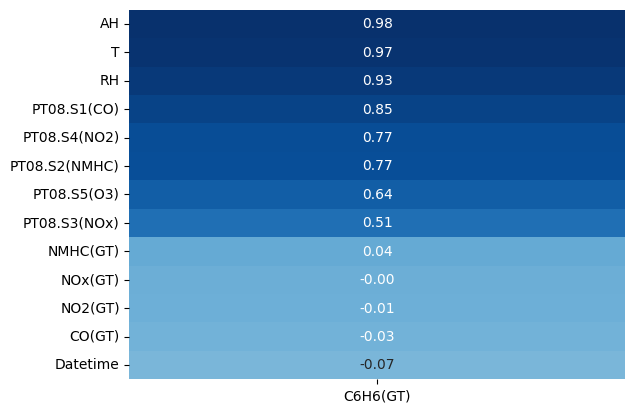

In [53]:
sns.heatmap(data=df.corr()[['C6H6(GT)']].sort_values('C6H6(GT)', ascending=False).drop('C6H6(GT)'),
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

## Model Training

In [56]:
# Splitting the data into features (X) and target (y)
X = df.drop(columns=['C6H6(GT)', 'Datetime'])
y = df['C6H6(GT)']

# 80 - 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

In [60]:
# Random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No scaling needed for random forest
rf_preds = rf_model.predict(X_test)

In [61]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)

In [62]:
# function to calculate MAE, MSE, RMSE and R-squared for a given model
def model_evaluation(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

# Evaluating each model
model_evaluation('Linear Regression', y_test, lr_preds)
model_evaluation('Random Forest', y_test, rf_preds)
model_evaluation('KNN Regressor', y_test, knn_preds)

# comparing all the models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'KNN Regressor'],
    'MAE': [mean_absolute_error(y_test, lr_preds),
            mean_absolute_error(y_test, rf_preds),
            mean_absolute_error(y_test, knn_preds)],
    'MSE': [mean_squared_error(y_test, lr_preds),
            mean_squared_error(y_test, rf_preds),
            mean_squared_error(y_test, knn_preds)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_preds)),
             np.sqrt(mean_squared_error(y_test, rf_preds)),
             np.sqrt(mean_squared_error(y_test, knn_preds))],
    'R²': [r2_score(y_test, lr_preds),
           r2_score(y_test, rf_preds),
           r2_score(y_test, knn_preds)]
})

# printing a table for easy comparision
print("\nModel Comparison:")
print(comparison.sort_values(by='RMSE'))


Model Comparison:
               Model       MAE       MSE      RMSE        R²
1      Random Forest  0.015221  0.009004  0.094888  0.999995
2      KNN Regressor  0.558942  0.800403  0.894653  0.999526
0  Linear Regression  0.821605  1.369441  1.170231  0.999188


In [63]:
def plot_bar_graph_compare(comp_type):
    plt.figure(figsize=(8, 6))
    plt.bar(comparison['Model'], comparison[comp_type].sort_values(ascending=False),
            color=['palegreen', 'skyblue', 'pink'])
    plt.title(f'{comp_type} Comparison of Models')
    plt.xlabel('Model')
    plt.ylabel(comp_type)
    plt.show()

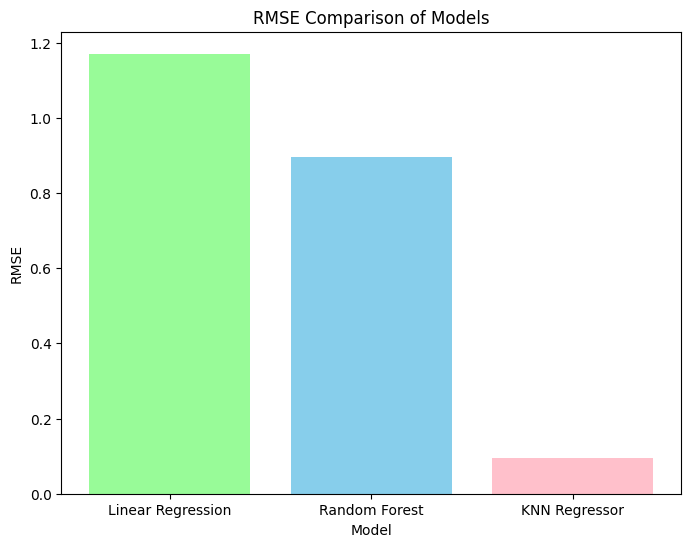

In [64]:
plot_bar_graph_compare("RMSE")

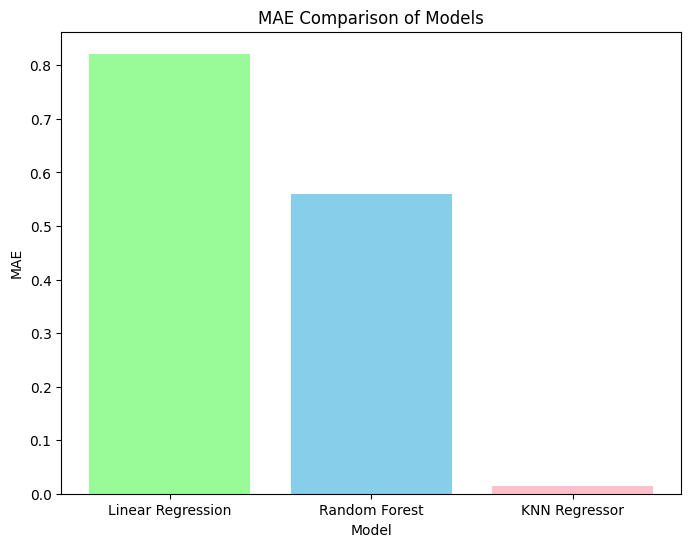

In [65]:
plot_bar_graph_compare("MAE")

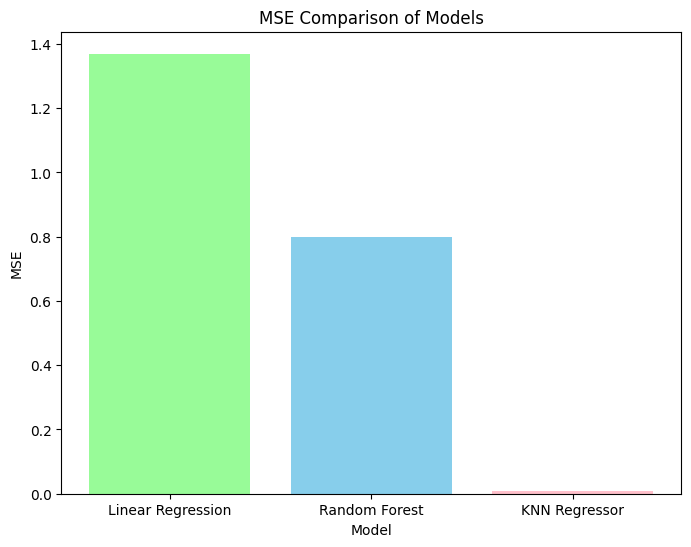

In [66]:
plot_bar_graph_compare("MSE")

#### Random Forest:

Best Performance: Among the three models, Random Forest has the lowest values for Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This indicates that it provides the most accurate predictions.</br>
High R² Score: The R² value is extremely close to 1 (0.999996), suggesting that the Random Forest model explains nearly all the variability in the target variable, making it highly reliable.


#### KNN Regressor:

Moderate Accuracy: KNN has relatively higher MAE, MSE, and RMSE compared to Random Forest but is still performing well with an R² of 0.999526. This means KNN can explain most of the variance but is less precise than Random Forest.</br>
Potential Improvement: The KNN model could benefit from further tuning (e.g., optimizing the number of neighbors) to see if it can achieve better accuracy metrics closer to Random Forest.


#### Linear Regression:

Lowest Performance: Linear Regression shows the highest error metrics (MAE, MSE, and RMSE), indicating it struggles to accurately predict outcomes compared to the other models.</br>
Acceptable R²: The R² value of 0.999188 is still high, meaning it captures a significant portion of the variance but has a larger spread of errors, which is typical in cases where the data may have nonlinear patterns better captured by more complex models like Random Forest.

In [69]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


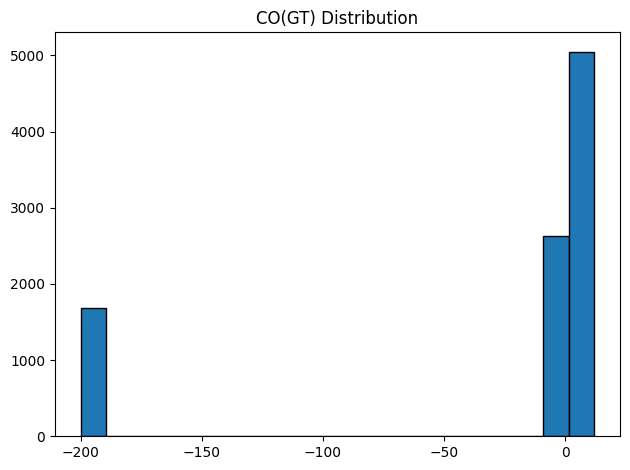

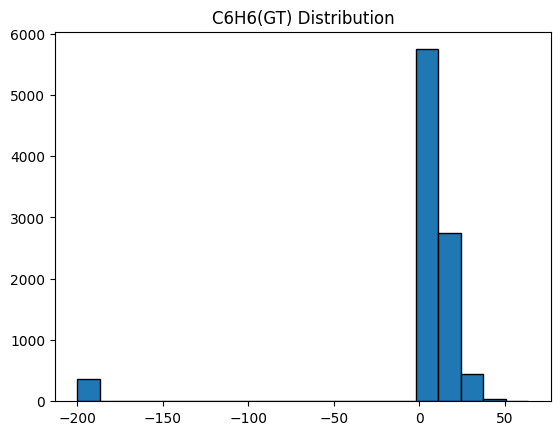

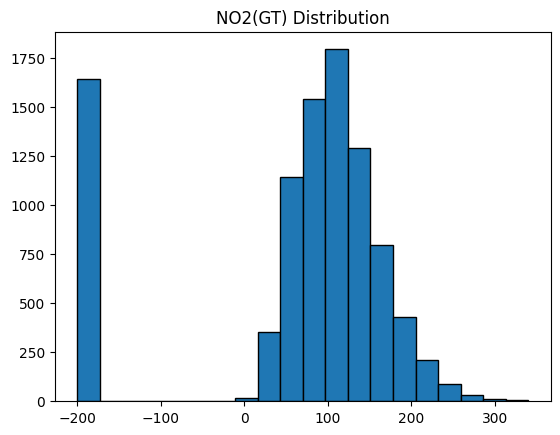

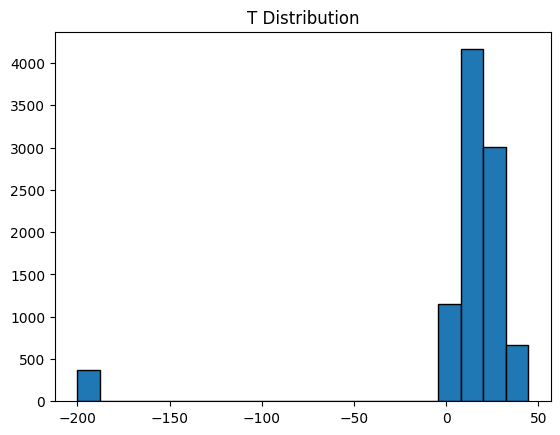

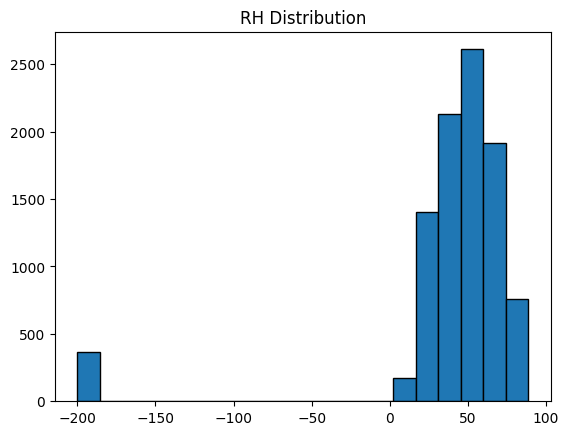

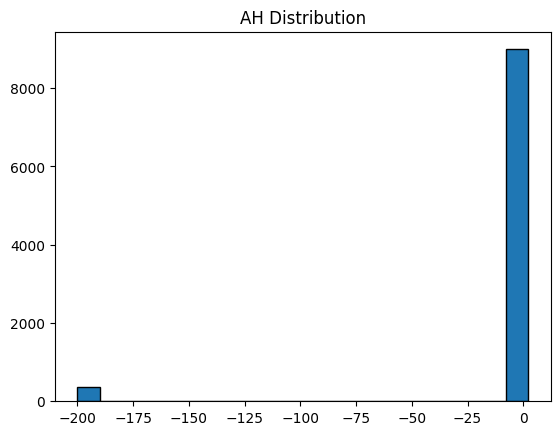

In [77]:
plt.figure(figure=(12,10))
plt.hist(df['CO(GT)'].dropna(),bins=20,edgecolor='black')
plt.title('CO(GT) Distribution')
plt.tight_layout()

plt.show()

plt.subplot(1,1,1)
plt.hist(df['C6H6(GT)'].dropna(),bins=20,edgecolor='black')
plt.title('C6H6(GT) Distribution')
plt.show()

plt.subplot(1,1,1)
plt.hist(df['NO2(GT)'].dropna(),bins=20,edgecolor='black')
plt.title('NO2(GT) Distribution')
plt.show()

plt.subplot(1,1,1)
plt.hist(df['T'].dropna(),bins=20,edgecolor='black')
plt.title('T Distribution')
plt.show()


plt.subplot(1,1,1)
plt.hist(df['RH'].dropna(),bins=20,edgecolor='black')
plt.title('RH Distribution')
plt.show()

plt.subplot(1,1,1)
plt.hist(df['AH'].dropna(),bins=20,edgecolor="black")
plt.title("AH Distribution")

plt.show()

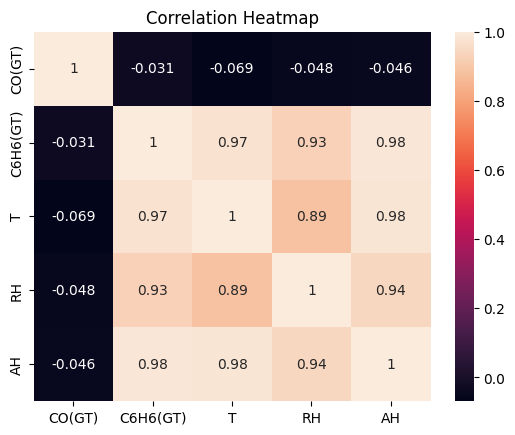

In [84]:
plt.figure(figure=(10,8))
corr=df[['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()
